In [ ]:
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import metrics
import itertools
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import preprocessing 
import statsmodels.formula.api as smf

In [ ]:
df = pd.read_csv('Mosquito.csv')
df.index = df['index']
df = df.drop('index',axis = 1)
df.head()

,Breteau,Aeg_aed_index,Res_index,Contain_index,Larvae_index,number,travel,AMB_TEMP,CH4,CO,...,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,UVB,WIND_SPE
index,,,,,,,,,,,,,,,,,,,,,
2005-10,1.487179,0.009744,1.538462,2.324706,15.846154,0.0,0.0,53710.01,1191.271,1490.23,...,83933.60,44628.1,178303.0,95307.0,197.2,136157.45,20731.2,1421.074,152.0,4038.57
2005-11,2.333333,0.023333,2.111111,3.405051,38.888889,0.0,0.0,32959.51,1234.131,1792.50,...,88407.03,67071.7,277692.0,131294.0,1.2,139997.23,25277.1,1504.007,169.5,3680.69
2005-13,3.538462,0.008462,1.000000,5.014069,7.461538,0.0,0.0,57583.59,1124.966,1335.87,...,68874.95,52936.8,142121.0,74474.0,102.6,146081.48,23208.3,1332.848,236.2,4680.96
2005-14,1.000000,0.021333,0.866667,1.769701,14.133333,1.0,0.0,54008.64,1189.927,1101.63,...,50068.45,56204.5,169800.0,73301.0,115.8,136098.30,19887.1,1331.514,266.5,4518.71
2005-15,2.132105,0.010974,1.950287,1.894605,30.787042,0.0,0.0,55734.13,1238.939,1561.27,...,72074.60,70654.8,201684.0,101087.0,24.6,144244.66,23087.0,1444.128,185.0,3887.65


## 資料做標準化

In [ ]:
def scale(x):
    max = x.max(0)
    min = x.min(0)
    x = (x - min)/(max-min)
    return x

In [ ]:
df_x = scale(df.drop('number',axis = 1))

## 切割資料

In [ ]:
x_train, x_test, y_train, y_test =  train_test_split(df_x, df['number'], test_size = 0.33, random_state = 42)

In [ ]:
x = x_train
x = sm.add_constant(x)
y = y_train

In [ ]:
poison_model = sm.GLM(y, x, family = sm.families.Poisson())
poison_results = poison_model.fit()

print(poison_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 number   No. Observations:                  244
Model:                            GLM   Df Residuals:                      221
Model Family:                 Poisson   Df Model:                           22
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -954.98
Date:                Tue, 12 Nov 2019   Deviance:                       1306.8
Time:                        00:36:09   Pearson chi2:                 1.57e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -26.4149      5.380     -4.910

## 選取重要變數 alpha = 0.01

In [ ]:
alpha = 0.01
name = list(poison_results.pvalues[poison_results.pvalues < alpha].index)

In [ ]:
x_train_ = sm.add_constant(x_train)
x = x_train_[name]
y = y_train

In [ ]:
poison_model = sm.GLM(y, x, family = sm.families.Poisson())
poison_results = poison_model.fit()

print(poison_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 number   No. Observations:                  244
Model:                            GLM   Df Residuals:                      227
Model Family:                 Poisson   Df Model:                           16
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -961.85
Date:                Tue, 12 Nov 2019   Deviance:                       1320.5
Time:                        00:36:11   Pearson chi2:                 1.56e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -24.9636      5.361     -4.657

In [ ]:
poison_results.get_prediction(x).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper
index,,,,
2008-10,0.735667,0.100651,0.562630,0.961921
2005-49,1.657254,0.493953,0.924026,2.972309
2006-1,0.129711,0.033965,0.077641,0.216701
2011-28,2.015751,0.373631,1.401722,2.898758
2009-23,2.173157,0.266207,1.709310,2.762876
...,...,...,...,...
2007-13,0.439758,0.047809,0.355365,0.544194
2007-46,2.573783,0.192981,2.222027,2.981224
2011-14,3.172144,0.318107,2.606112,3.861114


In [ ]:
poison_results.mu

array([ 0.73566716,  1.65725391,  0.12971063,  2.0157511 ,  2.17315712,
        1.24598585, 26.73460124,  4.49408743,  0.76356986,  1.10352105,
        4.09596715,  0.6878815 ,  3.78047548,  0.55806535,  3.23865177,
       30.52020795,  2.22700114,  1.03496119,  4.8415557 ,  2.41767956,
        1.30077561, 24.89832525,  0.76702653,  4.54366326,  5.60886054,
        1.01500586,  3.19789996, 15.09980771,  0.62340746, 23.68527813,
        2.22795061,  1.16426698,  3.68678554,  3.95958032,  4.4408247 ,
        0.66273071,  3.27984545,  0.20996065,  1.03460222,  0.54218076,
        0.85978541,  0.59318215,  5.89425142,  6.11791211, 44.01730227,
        1.0908787 ,  4.40845589, 14.32150739,  0.2675808 , 25.70101825,
        0.28731079,  3.15760213,  1.6858526 ,  7.14430257,  1.77398356,
       34.04490282,  3.20392626, 12.70028447,  0.75977872,  0.34319275,
        1.81601221,  3.18963204,  7.56481037,  1.02644813,  0.35109697,
        6.16671091, 16.06089922,  0.64972037,  2.53202999, 16.19

## test 作結果檢驗

In [ ]:
x_test = sm.add_constant(x_test)
test_x = x_test[name]
test_y = y_test

In [ ]:
poisson_predictions = poison_results.get_prediction(test_x_)
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

              mean   mean_se  mean_ci_lower  mean_ci_upper
index                                                     
2009-34   1.841413  0.210160       1.472325       2.303024
2005-51   0.866746  0.137700       0.634836       1.183375
2005-29  10.862688  1.860929       7.764521      15.197074
2011-50  10.403293  0.759185       9.016833      12.002941
2006-45   5.826080  0.558685       4.827825       7.030746
...            ...       ...            ...            ...
2010-26   2.268666  0.248322       1.830629       2.811516
2005-32   1.405439  0.147667       1.143872       1.726818
2011-23   0.417504  0.066676       0.305296       0.570952
2007-44   3.066635  0.222262       2.660536       3.534720
2011-25   4.320814  0.616717       3.266421       5.715564

[121 rows x 4 columns]


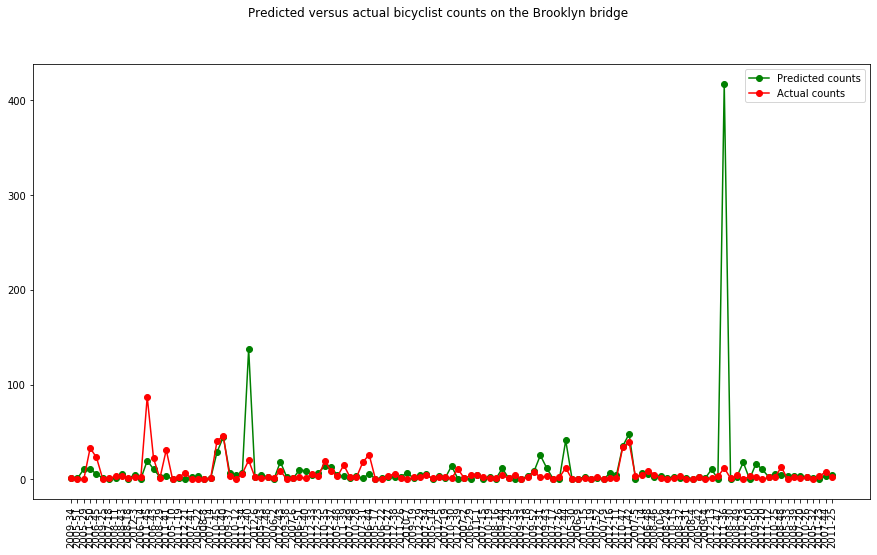

In [ ]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test
fig = plt.figure(figsize=(15, 8))
fig.suptitle('Predicted versus actual bicyclist counts on the Brooklyn bridge')
predicted, = plt.plot(x_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(x_test.index, actual_counts, 'ro-', label='Actual counts')
_xtick_labels = x_test.index
plt.xticks(np.arange(len(_xtick_labels)),list(_xtick_labels), rotation=90)
plt.legend(handles=[predicted, actual])
plt.show()

## 將離群值剔除

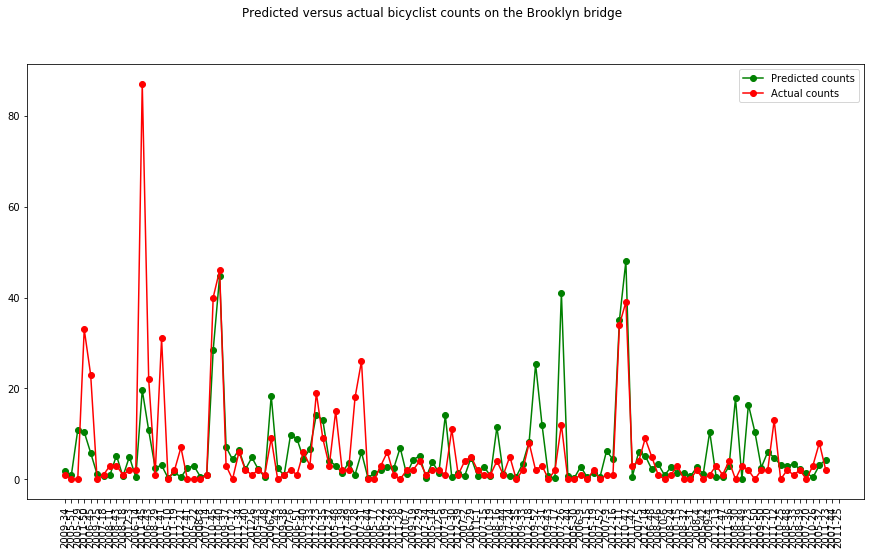

In [ ]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test
fig = plt.figure(figsize=(15, 8))
fig.suptitle('Predicted versus actual bicyclist counts on the Brooklyn bridge')
predicted, = plt.plot(x_test[predicted_counts < 100].index, predicted_counts[predicted_counts < 100], 'go-', label='Predicted counts')
actual, = plt.plot(x_test[predicted_counts < 100].index, actual_counts[predicted_counts < 100], 'ro-', label='Actual counts')
_xtick_labels = x_test.index
plt.xticks(np.arange(len(_xtick_labels)),list(_xtick_labels), rotation=90)
plt.legend(handles=[predicted, actual])
plt.show()

plt.clf()
fig = plt.figure(figsize=(8, 8))
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlim((0,100))
plt.ylim((0,100))
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

## 利用負二項分配校正lambda

### STEP 1: Fit the Poisson regression model on the data set. This will give us the vector of fitted rates λ.
### 將Poisson回歸模型擬合到數據集。這將為我們提供擬合率λ的向量。

In [ ]:
x_train['lambda_'] = poison_results.mu
x_train['number'] = y_train
x_train['AUX_OLS_DEP'] = x_train.apply(lambda x: ((x['number'] - x['lambda_'])**2 - x['number']) / x['lambda_'], axis=1)

C:\Users\User\Anaconda3\envs\tf2_rpy2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\envs\tf2_rpy2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### STEP 2: Fit the aux OLS regression model on the data set. This will give us the value of α

### 在數據集上擬合aux OLS回歸模型。這將給我們α的值

In [ ]:
ols_expr = """AUX_OLS_DEP ~ lambda_ - 1"""

In [ ]:
aux_olsr_results = smf.ols(ols_expr, x_train).fit()
print(aux_olsr_results.params)

lambda_    0.531077
dtype: float64


### STEP 3: Use the α from STEP 2 to fit the NB2 regression model to the data set.

### 使用步驟2中的α將NB2回歸模型擬合到數據集

####  Is α statistically significant?

In [ ]:
aux_olsr_results.tvalues

lambda_    6.6435
dtype: float64

### STEP 4: Use the fitted NB2 model to make predictions about expected counts on the test data set

### 使用擬合的NB2模型對測試數據集上的預期計數進行預測

In [ ]:
name.remove('const')

In [ ]:
#x_train = x_train.drop(['lambda_','AUX_OLS_DEP','number','BB_LAMBDA '],axis = 1)
nb2_training_results = sm.GLM(y_train, x_train[name], family = sm.families.NegativeBinomial(alpha = aux_olsr_results.params [0])).fit()

In [ ]:
print(nb2_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 number   No. Observations:                  244
Model:                            GLM   Df Residuals:                      228
Model Family:        NegativeBinomial   Df Model:                           15
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -574.55
Date:                Tue, 12 Nov 2019   Deviance:                       306.85
Time:                        01:17:53   Pearson chi2:                     308.
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Breteau         -13.3384      5.349     -2.494

### STEP 5: Test the goodness-of-fit of the NB2 model

### 測試NB2模型的擬合優度

## 利用test驗證模型

In [ ]:
nb2_predictions = nb2_training_results.get_prediction(x_test[name])

In [ ]:
predictions_summary_frame = nb2_predictions.summary_frame()
print(predictions_summary_frame)

              mean   mean_se  mean_ci_lower  mean_ci_upper
index                                                     
2009-34   3.744250  0.779432       2.489844       5.630636
2005-51   1.103032  0.305218       0.641288       1.897242
2005-29   4.683860  2.296771       1.791471      12.246103
2011-50  12.079046  1.879328       8.904258      16.385796
2006-45   4.196223  0.748166       2.958649       5.951463
...            ...       ...            ...            ...
2010-26   3.825091  0.766142       2.583160       5.664117
2005-32   1.415191  0.286812       0.951272       2.105354
2011-23   0.747823  0.198151       0.444893       1.257019
2007-44   3.195812  0.444634       2.433063       4.197677
2011-25   3.841751  1.400307       1.880480       7.848556

[121 rows x 4 columns]


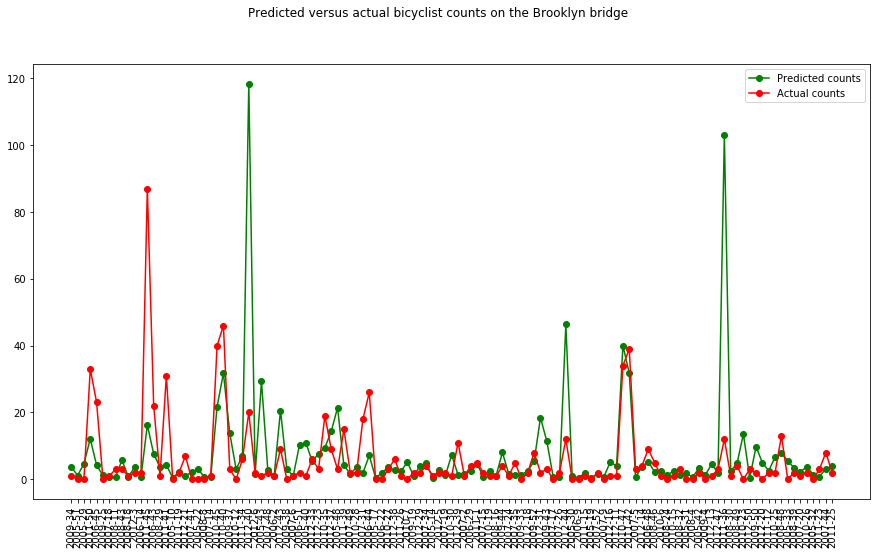

In [ ]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test
fig = plt.figure(figsize=(15, 8))
fig.suptitle('Predicted versus actual bicyclist counts on the Brooklyn bridge')
predicted, = plt.plot(x_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(x_test.index, actual_counts, 'ro-', label='Actual counts')
_xtick_labels = x_test.index
plt.xticks(np.arange(len(_xtick_labels)),list(_xtick_labels), rotation=90)
plt.legend(handles=[predicted, actual])
plt.show()